In [15]:
from qiskit import *
from math import pi

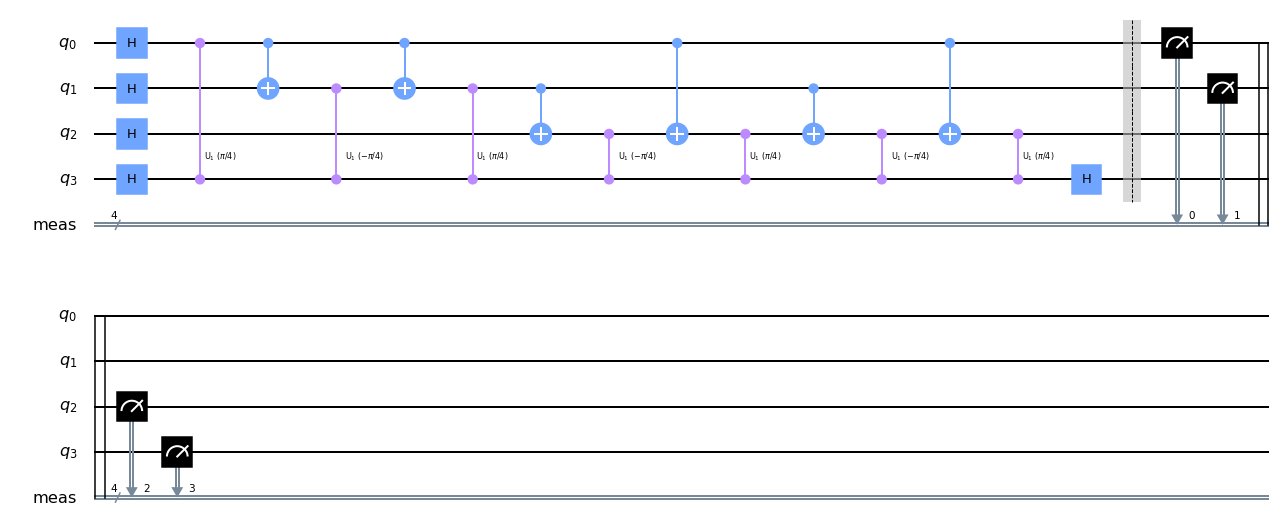

In [22]:
# CCCX
qc = QuantumCircuit(4)

qc.h(range(3))

# U = V^2^(n-2) = V^4    where n = 4
# HZH
qc.h(3)
# V
qc.cu1(pi/4, 0, 3)
# XOR 
qc.cx(0, 1)
# V-dagger
qc.cu1(-pi/4, 1, 3)
# Revert XOR
qc.cx(0, 1)
# V
qc.cu1(pi/4, 1, 3)
# XOR 
qc.cx(1, 2)
# V-dagger
qc.cu1(-pi/4, 2, 3)
# XOR
qc.cx(0, 2)
# V 
qc.cu1(pi/4, 2, 3)
# Revert XOR
qc.cx(1, 2)
# V-dagger
qc.cu1(-pi/4, 2, 3)
# Revert XOR
qc.cx(0, 2)
# V
qc.cu1(pi/4, 2, 3)
# HZH
qc.h(3)

qc.measure_all()    # qubits not reversed!
qc.draw('mpl')

In [23]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024, optimization_level = 3)
results = execution.result()
counts = results.get_counts()
print(counts)

{'0000': 118, '0001': 141, '0010': 124, '0011': 140, '0100': 137, '0101': 119, '0110': 129, '1111': 116}


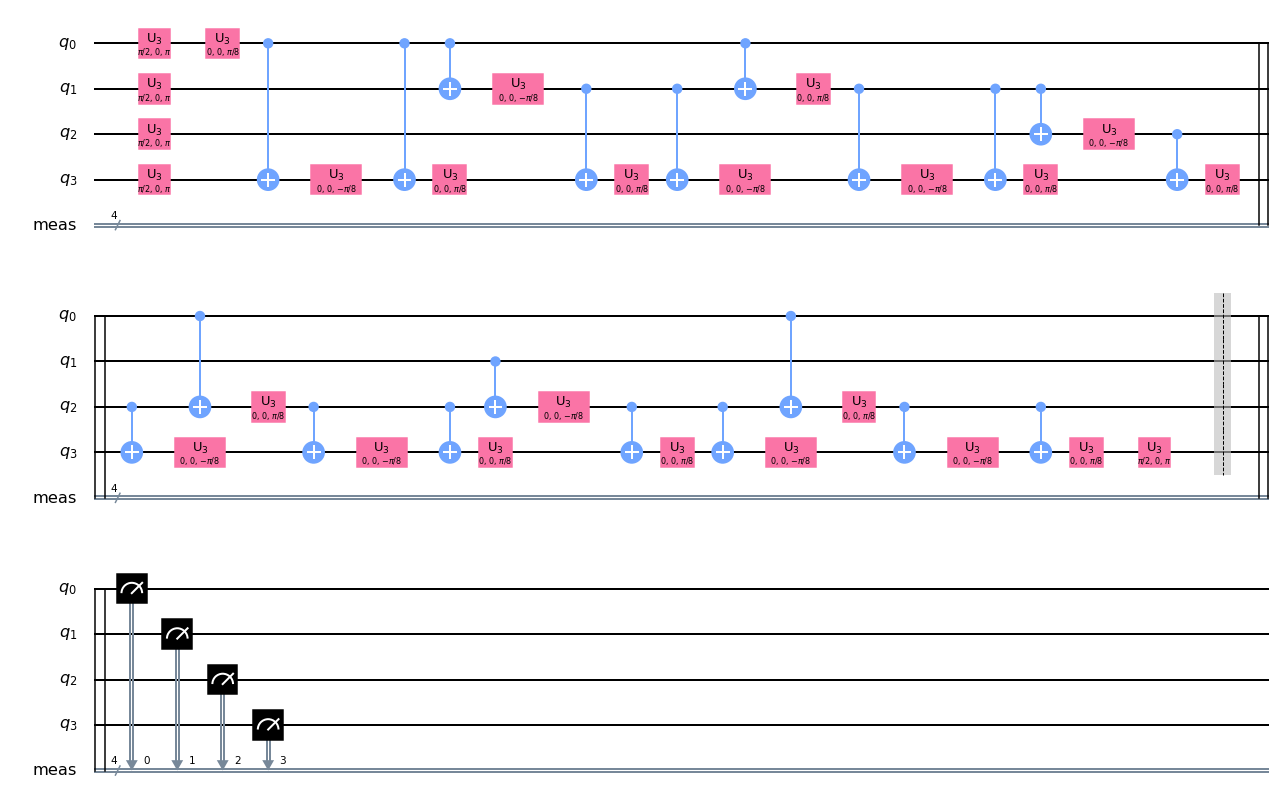

In [26]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)
new_circuit.draw('mpl')

In [27]:
new_circuit.count_ops()

OrderedDict([('u3', 26), ('cx', 20), ('measure', 4), ('barrier', 1)])

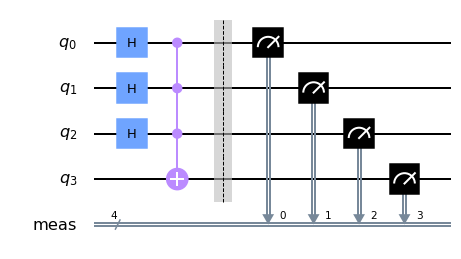

In [49]:
# CCCX Alternative
qc = QuantumCircuit(4)

qc.h(range(3))

qc.mcx([0, 1, 2], 3)

qc.measure_all()    # qubits not reversed!
qc.draw('mpl')

In [50]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024, optimization_level = 3)
results = execution.result()
counts = results.get_counts()
print(counts)

{'0000': 136, '0001': 113, '0010': 135, '0011': 116, '0100': 131, '0101': 118, '0110': 136, '1111': 139}


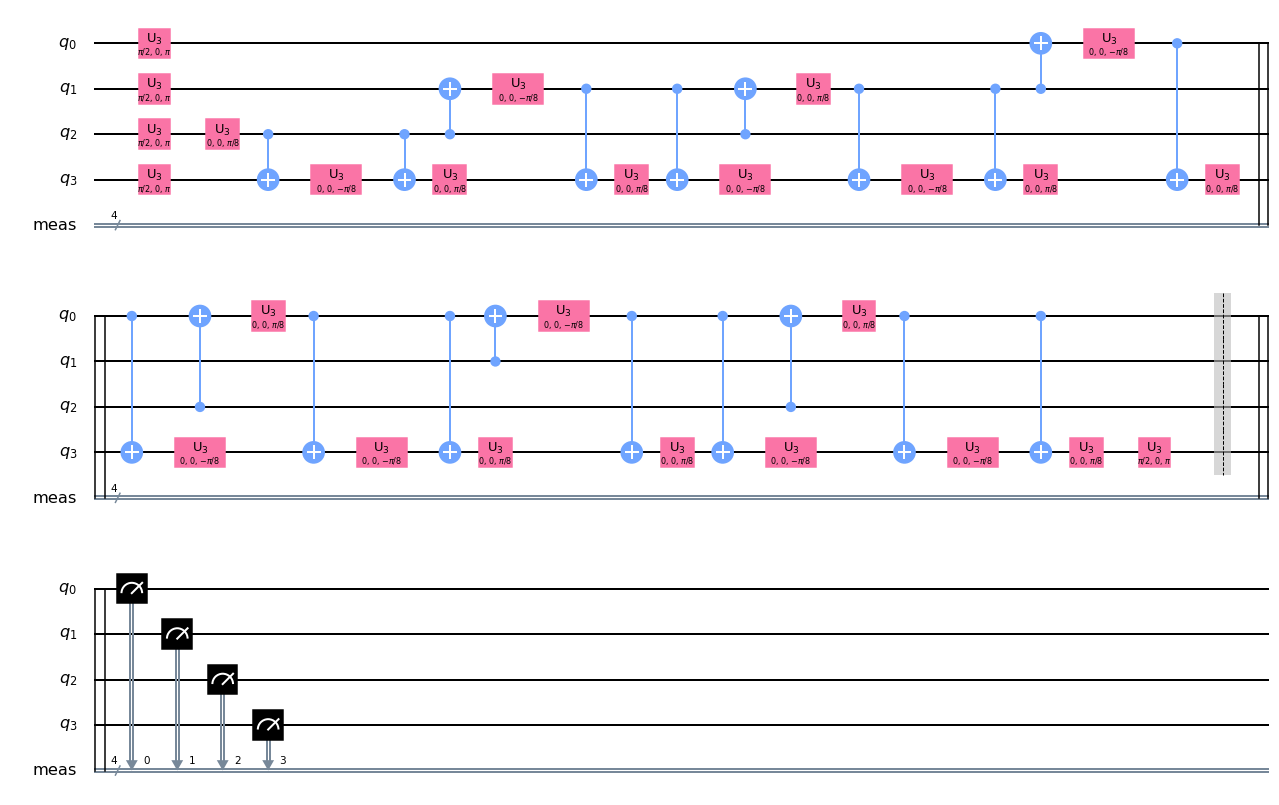

In [51]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)
new_circuit.draw('mpl')

In [52]:
new_circuit.count_ops()

OrderedDict([('u3', 26), ('cx', 20), ('measure', 4), ('barrier', 1)])